Author: **Lucía Sánchez González** // Date: **24 September 2021**

## R Exam


**Load the files GDP.csv and HDI.csv using read.csv()**:

In [1]:
#Saving the data of each file in a variable
GDP <- read.csv("GDP.csv",header = TRUE,sep = ",")
HDI <- read.csv("HDI.csv",header = TRUE,sep = ",")


**header = TRUE** : It is used to indicate that the first row of the file has to be saved as the columns' name of
the data frame that will contain the data of the file.
**sep = ","** : It is used to indicate that the data is separated by a coma, so the data after it has to be added to a new column of the data frame

**Analyze the file that you have just loaded with head() and str()**

In [2]:
head(GDP) 
head(HDI)
str(GDP)
str(HDI)

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
1,Almería,20.873,Andalucía y Extremadura
2,Cádiz,18.029,Andalucía y Extremadura
3,Córdoba,17.292,Andalucía y Extremadura
4,Granada,17.167,Andalucía y Extremadura
5,Huelva,18.207,Andalucía y Extremadura
6,Jaén,16.433,Andalucía y Extremadura


,Province,HDI
,<chr>,<dbl>
1,Cádiz,0.913
2,Almería,0.915
3,Jaén,0.915
4,Huelva,0.917
5,Badajoz,0.919
6,Córdoba,0.920


'data.frame':	50 obs. of  3 variables:
 $ Province      : chr  "Almería" "Cádiz" "Córdoba" "Granada" ...
 $ GDP.per.capita: num  20.9 18 17.3 17.2 18.2 ...
 $ CCAA          : chr  "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" ...
'data.frame':	50 obs. of  2 variables:
 $ Province: chr  "Cádiz" "Almería" "Jaén" "Huelva" ...
 $ HDI     : num  0.913 0.915 0.915 0.917 0.919 0.92 0.92 0.921 0.923 0.924 ...


The function **head()** allows us to see the six firsts rows with all the variables of the data frames. **str()** allows us to see the internal structure of the object we give. 

These functions allows us to know the next information about the files:

* **GDP**: It is a data frame that contains 50 rows with 3 variables (columns) each one. The firts variable is called "Province" and contains data type "character" (chr).The second variable is "GDP.per.capita" and contains "numeric" (num) data. The third variable is called CCAA and contains strings of characters as data. 
* **HDI** : It is also a data frame that contains 50 rows but with 2 variables each one. The first column it is equal as the firts column of "GDP". The second variable is called "HDI" and it's a numerical variable. 



**Glue together the two data frames by columns (one next to the other) using cbind(). We want the province to match on the same rows, so you need first to sort the rows of the two data frames by Province, using order()**

In [15]:
###First we sort the data frame's rows by the variable "Province"
GDP_sorted <- GDP[order(GDP$Province),]

#head(GDP_sorted) to see if it worked right

HDI_sorted <- HDI[order(HDI$Province),]

#head(HDI_sorted)

### Then we bind the data frames by the columns
GDP_HDI <- cbind(GDP_sorted,HDI_sorted)

head(GDP_HDI)

,Province,GDP.per.capita,CCAA,Province,HDI
,<chr>,<dbl>,<chr>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,Álava,0.990
26,Albacete,17.864,Castilla-La Mancha,Albacete,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,Alicante,0.930
1,Almería,20.873,Andalucía y Extremadura,Almería,0.915
12,Asturias,21.634,Asturias y Cantabria,Asturias,0.956
16,Ávila,18.382,Castilla y León,Ávila,0.952


To order the data frames' rows by Province, we use the function order() that gives us the indexes of the values ordered. Then we use this indexes to order the entire data frame. 

**The new data frame will contain two columns names "Province". remove one of the columns**

In [16]:
GDP_HDI <- GDP_HDI[,c(1,2,3,5)]


,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,0.990
26,Albacete,17.864,Castilla-La Mancha,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,0.930
1,Almería,20.873,Andalucía y Extremadura,0.915
12,Asturias,21.634,Asturias y Cantabria,0.956
16,Ávila,18.382,Castilla y León,0.952


Here we use a numeric vector as the indexes of the columns we want in our data frame. 

**Check that everything is fine with head() and tail(). The final data frame should have 4 columns: Province GDP.per.capita, CCAA and HDI. With each province matching its CCAA. (Fig, 1)** 

In [17]:
head(GDP_HDI)
tail(GDP_HDI)

,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,0.990
26,Albacete,17.864,Castilla-La Mancha,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,0.930
1,Almería,20.873,Andalucía y Extremadura,0.915
12,Asturias,21.634,Asturias y Cantabria,0.956
16,Ávila,18.382,Castilla y León,0.952


,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
29,Toledo,19.251,Castilla-La Mancha,0.933
36,Valencia,22.538,Comunitat Valenciana y Murcia,0.946
24,Valladolid,23.947,Castilla y León,0.978
50,Vizcaya,27.705,País Vasco Navarra y Rioja,0.988
25,Zamora,17.952,Castilla y León,0.959
11,Zaragoza,26.082,Aragon,0.968


**Create scatterplot of text using geom_point(). Plot the GDP.per.capita (x-axis) against the HDI (y-axis). Color the points by CCAA (use color=CCAA inside the aes() function of geom_point).**

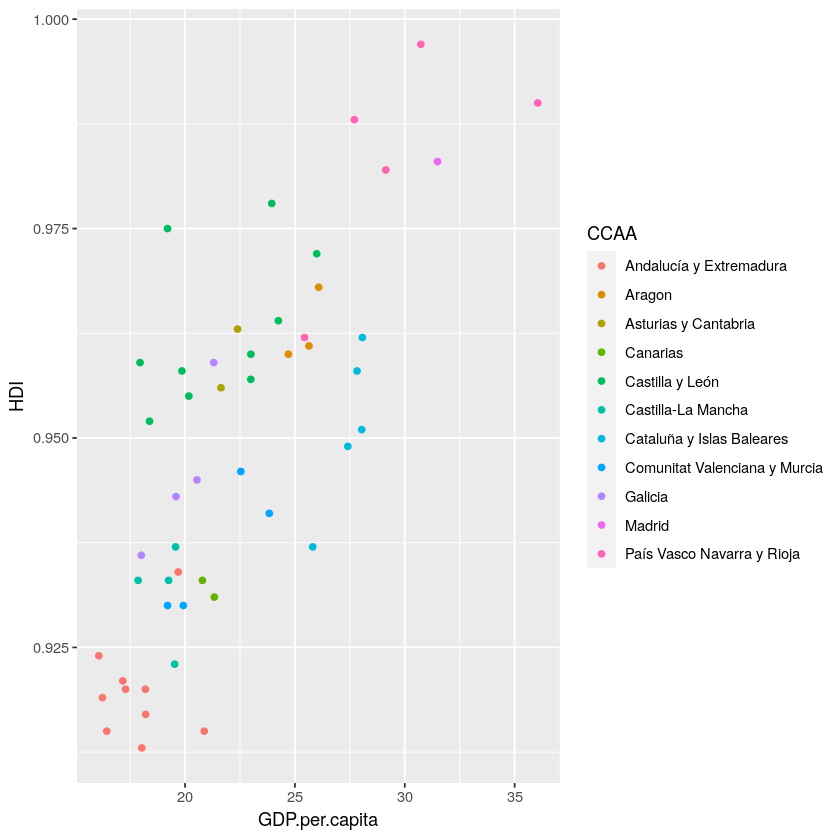

In [20]:
#Loads the ggplot2 package
library(ggplot2)

#plot the scatteplot with geom_point
ggplot(GDP_HDI,aes(x = GDP.per.capita,y = HDI))+geom_point(aes(color = CCAA))

**Do the same but use geom_text(). Specify as labels the names of the provinces, using aes(label=Province) inside geom_text. Color by CCAA. Also specify check_overlap=T so that the names do not overlap, if you want. (Fig, 2)**

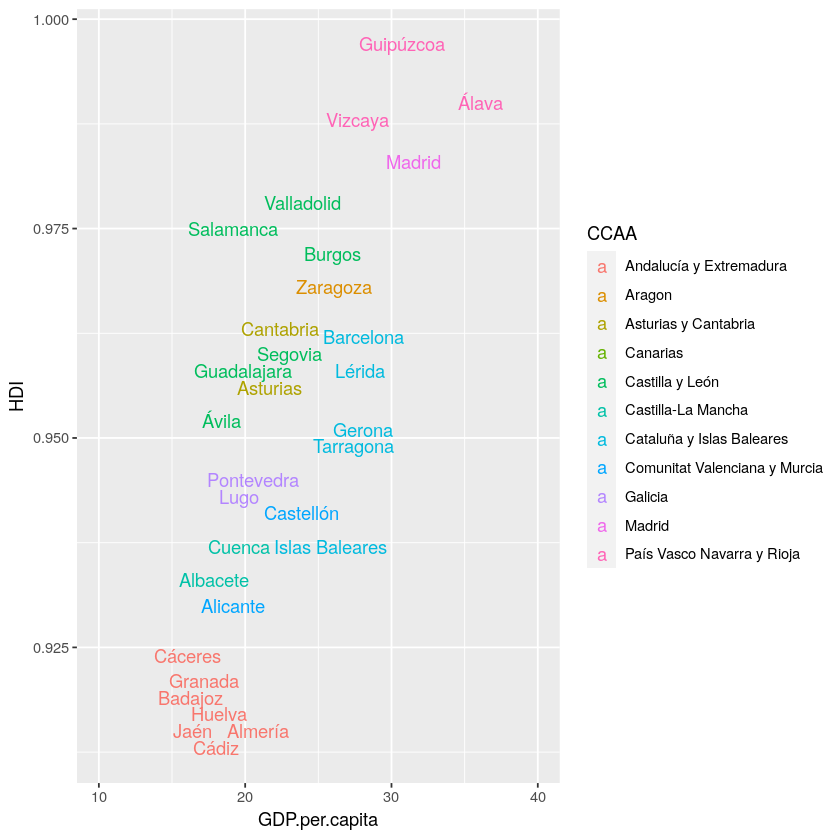

In [61]:
#plot the scatteplot with geom_text
ggplot(GDP_HDI,aes(x = GDP.per.capita,y = HDI))+
        geom_text(aes(label = Province,color = CCAA),check_overlap = T)+xlim(10, 40)

I used "xlim(10,40)" to change the limits of the axis x so we can see all the labels in a proper way. If we don't change it, some  names of the provinces appear cut off. 

**Calculate the mean and standard deviation of GDP and HDI, by CCAA, using aggregate ().**

In [83]:
#COMPUTE THE MEAN:
mean_GDP<- aggregate(GDP_HDI$GDP.per.capita,list(GDP_HDI$CCAA), mean)
colnames(mean_GDP) <- c("CCAA","mean_GDP")#changes the columns' names
mean_GDP#shows the data frame obtained

mean_HDI <- aggregate(GDP_HDI$HDI, list(GDP_HDI$CCAA),mean)
colnames(mean_HDI) <- c("CCAA","mean_HDI")
mean_HDI

#COMPUTE THE STANDARD DEVIATION:
sd_GDP<- aggregate(GDP_HDI$GDP.per.capita,list(GDP_HDI$CCAA), sd)
colnames(sd_GDP) <- c("CCAA","sd_GDP")
sd_GDP

sd_HDI <- aggregate(GDP_HDI$HDI, list(GDP_HDI$CCAA),sd)
colnames(sd_HDI) <- c("CCAA","sd_HDI")
sd_HDI



CCAA,mean_GDP
<chr>,<dbl>
Andalucía y Extremadura,17.81970
Aragon,25.47433
Asturias y Cantabria,22.01200
Canarias,21.06150
Castilla y León,21.57390
Castilla-La Mancha,19.05250
Cataluña y Islas Baleares,27.43120
Comunitat Valenciana y Murcia,21.37275
Galicia,19.86075


CCAA,mean_HDI
<chr>,<dbl>
Andalucía y Extremadura,0.91980
Aragon,0.96300
Asturias y Cantabria,0.95950
Canarias,0.93200
Castilla y León,0.96300
Castilla-La Mancha,0.93150
Cataluña y Islas Baleares,0.95140
Comunitat Valenciana y Murcia,0.93675
Galicia,0.94575


CCAA,sd_GDP
<chr>,<dbl>
Andalucía y Extremadura,1.5391112
Aragon,0.7045824
Asturias y Cantabria,0.5345727
Canarias,0.3839590
Castilla y León,2.7926986
Castilla-La Mancha,0.8047768
Cataluña y Islas Baleares,0.9434594
Comunitat Valenciana y Murcia,2.1781260
Galicia,1.4205488


CCAA,sd_HDI
<chr>,<dbl>
Andalucía y Extremadura,0.005977736
Aragon,0.004358899
Asturias y Cantabria,0.004949747
Canarias,0.001414214
Castilla y León,0.008956686
Castilla-La Mancha,0.005972158
Cataluña y Islas Baleares,0.009607289
Comunitat Valenciana y Murcia,0.008057088
Galicia,0.009639329


aggregates allows us to apply a the function we indicate to our data. In this case we obtain a data frame with the names of the CCAA and the values of mean or standard deviation. I used the function colnames() to change the columns' names. 

**Create a new data frame where you put each CCAA with the corresponding mean GDP, mean HDI, stdev GDP and stdev HDI**

In [84]:
CCAA_df <- data.frame("CCAA" = mean_GDP$CCAA, "mean_GDP" = mean_GDP$mean_GDP,"mean_HDI" = mean_HDI$mean_HDI,"stdev_GDP" = sd_GDP$sd_GDP,"stdev_HDI" = sd_HDI$sd_HDI)
CCAA_df

CCAA,mean_GDP,mean_HDI,stdev_GDP,stdev_HDI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


**Madrid is a single province CCAA, so you will see that its standar deviation is NA. Replace those NAs with zeros, using is.na(). (Fig, 3)**

In [85]:
CCAA_df[is.na(CCAA_df)] <- 0
CCAA_df

CCAA,mean_GDP,mean_HDI,stdev_GDP,stdev_HDI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


is.na(CCAA_df) returns a data frame with boolean data, where if the original data is a NA = TRUE, and if not = FALSE. Then we can use that data frame with TRUE/FALSE values to index the original and indicate to put 0 where there is a TRUE value.

**Plot again the original scatterplot with geom_point and color by CCAA.**

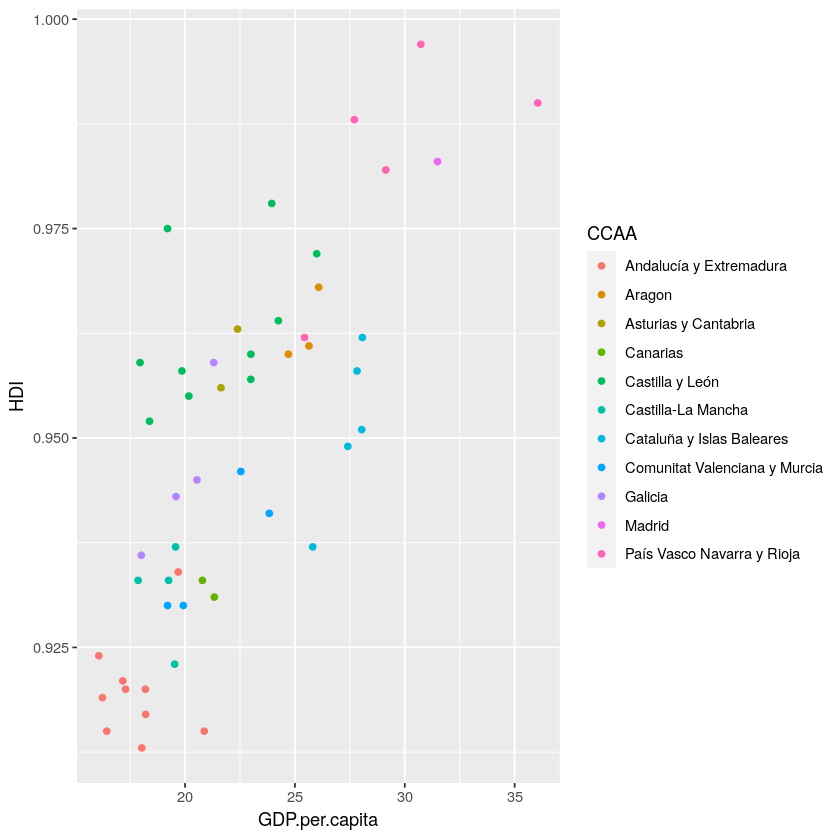

In [86]:
ggplot(GDP_HDI,aes(x = GDP.per.capita,y = HDI))+geom_point(aes(color = CCAA))

**Add over this plot another scatterplot using the new data frame (specify data=...), plotting the mean GDP against the mean HDI by CCAA that you have calculated with aggregate. These points should appear somewhere in the middle of their corresponding provinces.**

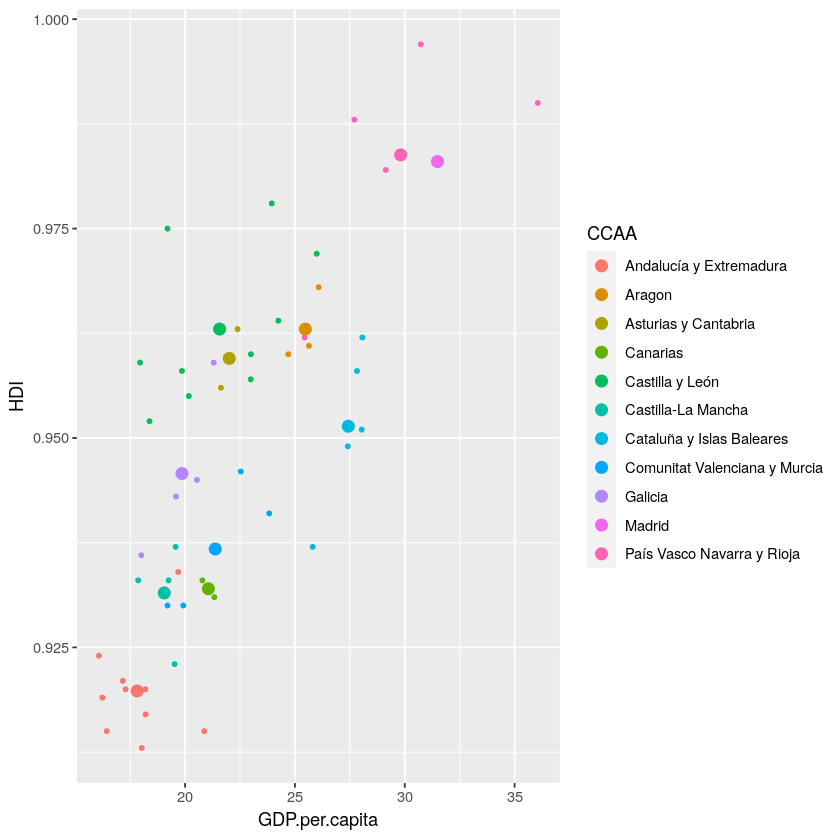

In [87]:
ggplot()+geom_point(data = GDP_HDI,aes(x = GDP.per.capita,y = HDI,color = CCAA), size = 1)+
        geom_point(data = CCAA_df,aes(x = mean_GDP,y = mean_HDI, color = CCAA),size = 3)

To differenciate the "mean points" from the rest of the points, I plot them with a larger size. 

**Add also vertical and horizontal error bars to express the variablity for each CCAA (with geom_errorbar and geom_errorbarh). For geom_errorbar() you have to specify the aestetic paramters x, y, ymin and ymax. For geom_errorbarh you have to specify the aestetic paramters x, y, xmin and xmax.**

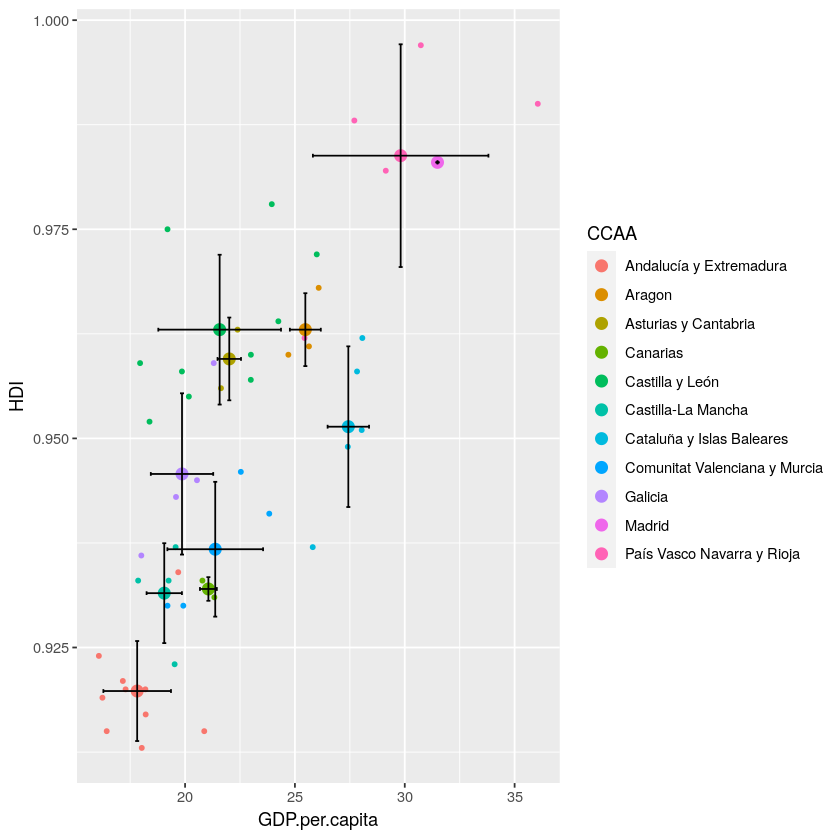

In [89]:
ggplot()+geom_point(data = GDP_HDI,aes(x = GDP.per.capita,y = HDI,color = CCAA), size = 1)+
        geom_point(data = CCAA_df,aes(x = mean_GDP,y = mean_HDI, color = CCAA),size = 3)+
        geom_errorbar(data = CCAA_df,aes(x = mean_GDP, ymax = mean_HDI + stdev_HDI,ymin = mean_HDI - stdev_HDI))+
        geom_errorbarh(data = CCAA_df,aes(y = mean_HDI, xmax = mean_GDP + stdev_GDP,xmin = mean_GDP - stdev_GDP))

**Finally, add the name of each CCAA on the plot with geom_label(). You can add the parameters hjust=1, vjust=1 to move the labels a little bit so they don't overlap the points (Fig, 4)**

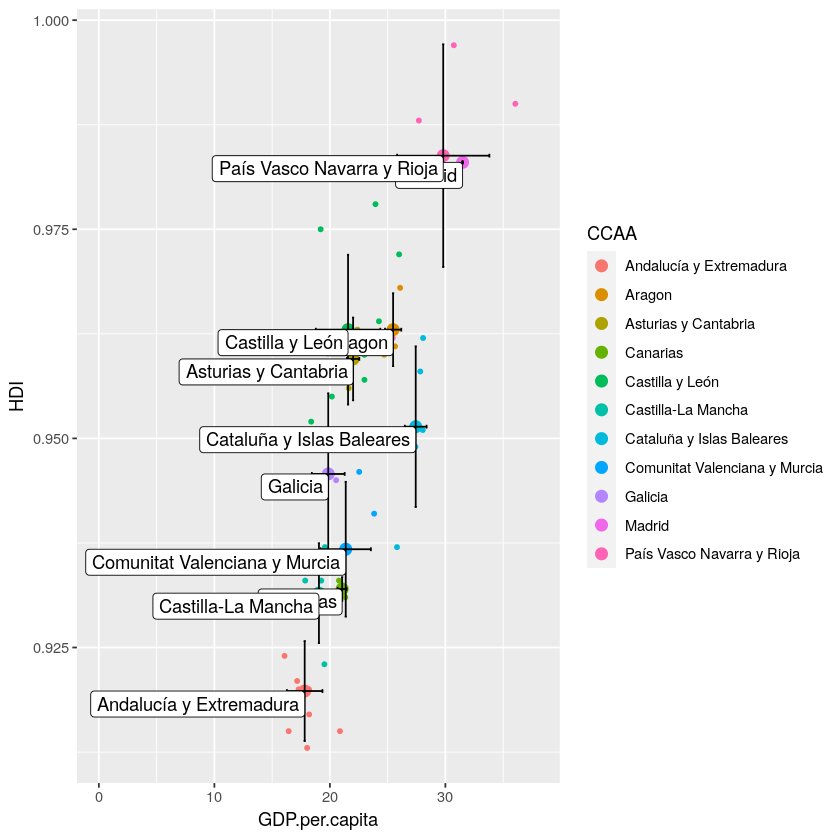

In [98]:
ggplot()+geom_point(data = GDP_HDI,aes(x = GDP.per.capita,y = HDI,color = CCAA), size = 1)+
        geom_point(data = CCAA_df,aes(x = mean_GDP,y = mean_HDI, color = CCAA),size = 3)+
        geom_errorbar(data = CCAA_df,aes(x = mean_GDP, ymax = mean_HDI + stdev_HDI,ymin = mean_HDI - stdev_HDI))+
        geom_errorbarh(data = CCAA_df,aes(y = mean_HDI, xmax = mean_GDP + stdev_GDP,xmin = mean_GDP - stdev_GDP))+
        geom_label(data = CCAA_df,aes(x = mean_GDP, y = mean_HDI, label = CCAA),vjust = 1,hjust = 1)+
        xlim(0,38)